Dataset loaded successfully from local file.

Dataset Shape: (150, 6)

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Summary Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000      

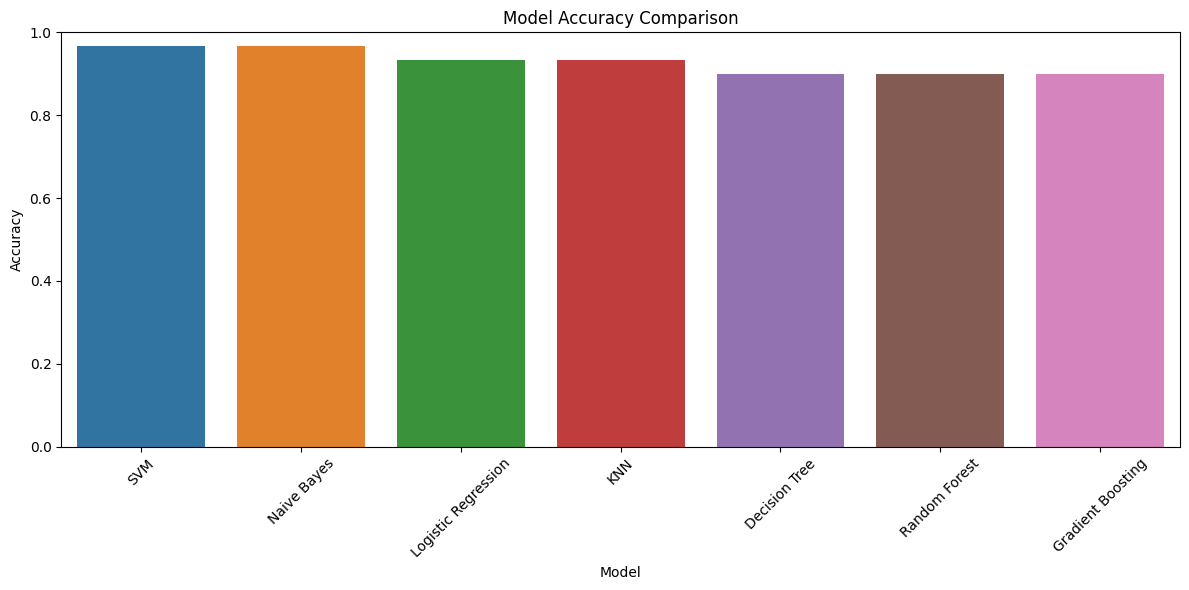


Best Model: SVM with accuracy 0.9667

Classification Report for Best Model:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



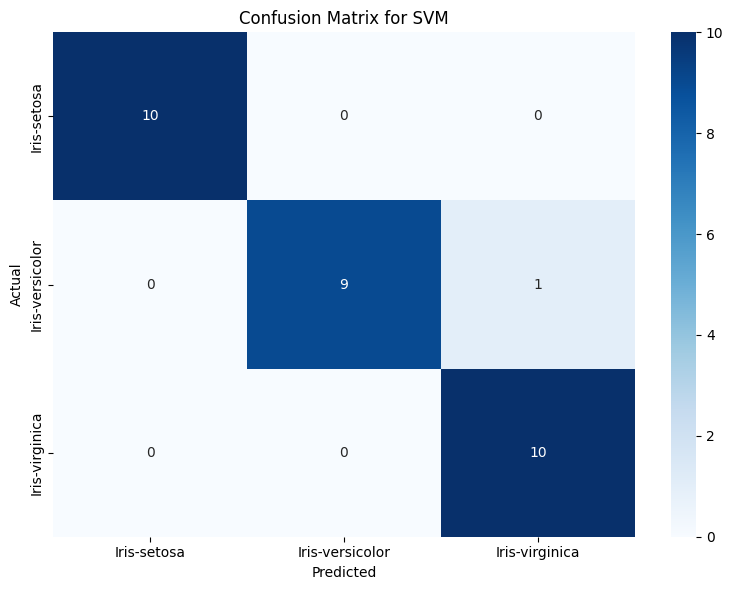


Performing hyperparameter tuning for SVM...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.9833
Accuracy with tuned hyperparameters: 0.9667

Classification Report for Tuned Model:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



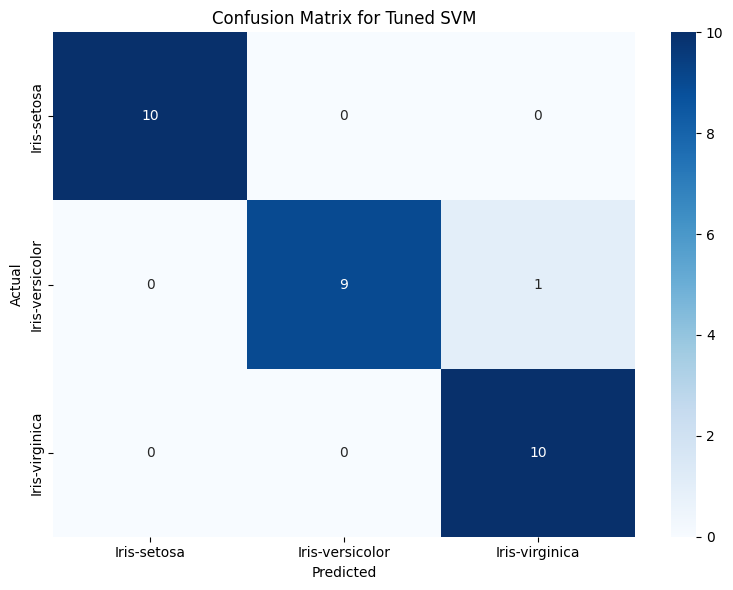


Saving only the best model to file...
Best model (SVM) saved to 'best_flower_species_model.pkl'
Scaler saved to 'flower_species_scaler.pkl'

Example: Predicting species for new flower samples
New flower samples:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            6.7           3.1            4.7           1.5
2            7.0           3.2            6.0           2.5

Predicted species:
Sample 1: Iris-setosa
Sample 2: Iris-versicolor
Sample 3: Iris-virginica

To use the saved model on new data, use the 'predict_flower_species' function
Example: predictions = predict_flower_species(new_flower_data)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

# Load the dataset
try:
    # Try to load from a local file
    df = pd.read_csv('/kaggle/input/iris-species/Iris.csv')
    print("Dataset loaded successfully from local file.")
except FileNotFoundError:
    # If local file not found, use the iris dataset as an example
    from sklearn.datasets import load_iris
    iris = load_iris()
    iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    
    # Rename columns to match specified feature names
    column_mapping = {
        'sepal length (cm)': 'SepalLengthCm',
        'sepal width (cm)': 'SepalWidthCm',
        'petal length (cm)': 'PetalLengthCm',
        'petal width (cm)': 'PetalWidthCm'
    }
    
    iris_df = iris_df.rename(columns=column_mapping)
    iris_df['Species'] = [iris.target_names[i] for i in iris.target]
    df = iris_df
    print("Using example Iris dataset with renamed columns.")

# Make sure we're using the correct feature names
expected_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feature in expected_features:
    if feature not in df.columns:
        print(f"Warning: {feature} not found in dataset. Available columns are: {df.columns.tolist()}")

# Display basic information about the dataset
print("\nDataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

# Prepare data for modeling - Using exactly 80% training and 20% testing
X = df[expected_features]
y = df['Species']

# Split with 80% training and 20% testing as specified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} samples ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]*100:.1f}%)")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define all models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print results
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Cross-validation on training data
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Plot model comparison
plt.figure(figsize=(12, 6))
models_df = pd.DataFrame({'Model': list(results.keys()), 'Accuracy': list(results.values())})
models_df = models_df.sort_values('Accuracy', ascending=False)
sns.barplot(x='Model', y='Accuracy', data=models_df)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Find the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Detailed evaluation of the best model
y_pred_best = best_model.predict(X_test_scaled)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for best model
plt.figure(figsize=(8, 6))
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Hyperparameter tuning for the best model only
param_grid = {}

# Define hyperparameters to tune based on model type
if isinstance(best_model, LogisticRegression):
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs', 'newton-cg'],
    }
elif isinstance(best_model, DecisionTreeClassifier):
    param_grid = {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }
elif isinstance(best_model, RandomForestClassifier):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    }
elif isinstance(best_model, SVC):
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.1, 1]
    }
elif isinstance(best_model, KNeighborsClassifier):
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
elif isinstance(best_model, GradientBoostingClassifier):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }

# Perform hyperparameter tuning
print(f"\nPerforming hyperparameter tuning for {best_model_name}...")
grid_search = GridSearchCV(best_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate with best parameters
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test_scaled)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"Accuracy with tuned hyperparameters: {accuracy_tuned:.4f}")
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix for tuned model
plt.figure(figsize=(8, 6))
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Confusion Matrix for Tuned {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature Importance (for models that support it)
if hasattr(tuned_model, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    feature_importance = pd.DataFrame({
        'Feature': expected_features,
        'Importance': tuned_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance for {best_model_name}')
    plt.tight_layout()
    plt.show()
elif hasattr(tuned_model, 'coef_'):
    plt.figure(figsize=(10, 6))
    coefficients = pd.DataFrame({
        'Feature': expected_features,
        'Coefficient': tuned_model.coef_[0] if tuned_model.coef_.ndim > 1 else tuned_model.coef_
    }).sort_values('Coefficient', ascending=False)
    
    sns.barplot(x='Coefficient', y='Feature', data=coefficients)
    plt.title(f'Feature Coefficients for {best_model_name}')
    plt.tight_layout()
    plt.show()

# Save ONLY the best tuned model and scaler to pkl files
print("\nSaving only the best model to file...")
joblib.dump(tuned_model, 'best_flower_species_model.pkl')
joblib.dump(scaler, 'flower_species_scaler.pkl')
print(f"Best model ({best_model_name}) saved to 'best_flower_species_model.pkl'")
print("Scaler saved to 'flower_species_scaler.pkl'")

# Example function to load and use the saved model
def predict_flower_species(new_data, model_path='best_flower_species_model.pkl', scaler_path='flower_species_scaler.pkl'):
    """
    Load the saved model and predict flower species for new data.
    
    Parameters:
    new_data (pandas.DataFrame): DataFrame with the required features
    model_path (str): Path to the saved model
    scaler_path (str): Path to the saved scaler
    
    Returns:
    numpy.ndarray: Predicted species
    """
    # Load the model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    
    # Ensure data has required features
    required_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
    for feature in required_features:
        if feature not in new_data.columns:
            raise ValueError(f"Required feature {feature} not found in the data")
    
    # Extract features
    X_new = new_data[required_features]
    
    # Scale features
    X_new_scaled = scaler.transform(X_new)
    
    # Make predictions
    predictions = model.predict(X_new_scaled)
    
    return predictions

# Example: Predicting species for new flower samples
print("\nExample: Predicting species for new flower samples")
new_samples = pd.DataFrame({
    'SepalLengthCm': [5.1, 6.7, 7.0],
    'SepalWidthCm': [3.5, 3.1, 3.2],
    'PetalLengthCm': [1.4, 4.7, 6.0],
    'PetalWidthCm': [0.2, 1.5, 2.5]
})

print("New flower samples:")
print(new_samples)

# Predict using our helper function
predictions = predict_flower_species(new_samples)

print("\nPredicted species:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: {pred}")

print("\nTo use the saved model on new data, use the 'predict_flower_species' function")
print("Example: predictions = predict_flower_species(new_flower_data)")